<a href="https://colab.research.google.com/github/ayu-shiirathore/ML_LabEval_102203816/blob/main/ML_Lab_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv
Linear Regression - MSE: 0.1062, R2: 0.6356
Random Forest - MSE: 0.1116, R2: 0.6169
Gradient Boosting - MSE: 0.1134, R2: 0.6106
K-Nearest Neighbors - MSE: 0.3704, R2: -0.2714


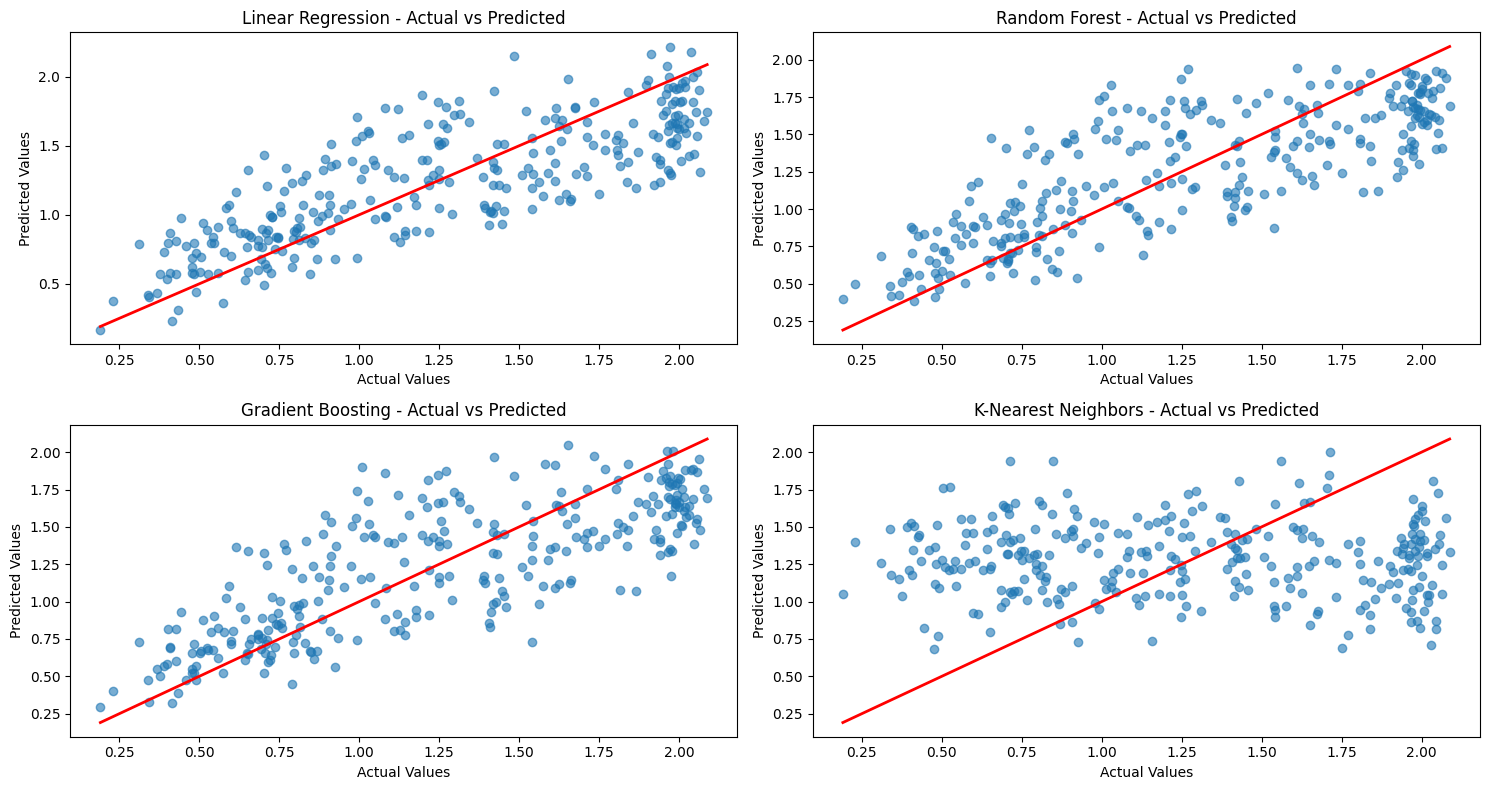

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

selected_target = 'Target2'
features = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5']).columns
X = data[features]
y = data[selected_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R2": r2, "Predictions": y_pred}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")
plt.figure(figsize=(15, 8))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test.values, result["Predictions"], alpha=0.6)
    plt.plot([min(y_test.values), max(y_test.values)],
             [min(y_test.values), max(y_test.values)], color="red", lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()